===== 路径2：情绪分类分组统计结果 =====
              涨跌幅（百分比）                    次日涨跌幅（百分比）           情绪值        
                  mean median   std count       mean median   mean max min
情绪分类                                                                      
Extreme Fear      0.06   0.20  4.26   600       0.15   0.20  18.84  25   5
Extreme Greed     0.33   0.07  4.11   281       0.40   0.26  83.28  95  76
Fear             -0.09  -0.08  3.14   827      -0.04  -0.11  35.32  46  26
Greed             0.34   0.16  2.84   789       0.31   0.11  66.62  75  55
Neutral           0.13  -0.02  2.76   388      -0.05  -0.06  50.57  54  47


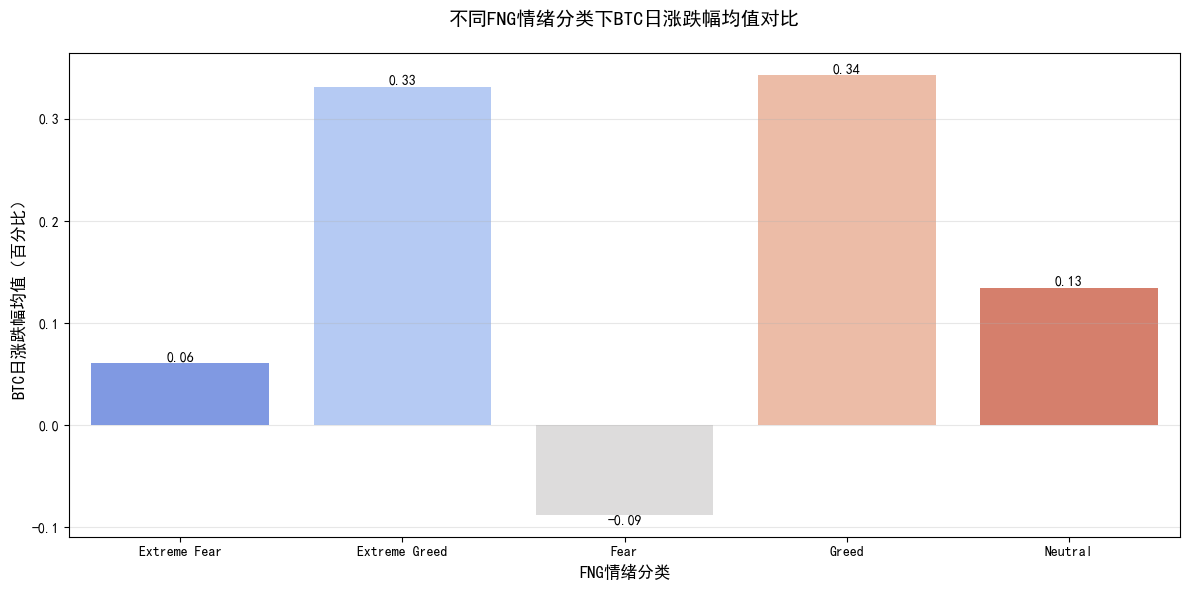


===== 路径2：情绪区间分组统计（次日涨跌幅） =====
      mean   std
情绪区间            
极度恐惧  0.30  4.79
恐惧   -0.08  3.38
中性    0.00  2.61
贪婪    0.31  3.08
极度贪婪  0.83  4.47


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ========== 1. 配置结果保存路径 ==========
result_dir = r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\结果数据"
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
    print(f"✅ 已创建结果数据文件夹：{result_dir}")

# ========== 2. 读取清洗后的数据 ==========
data_path = r"C:\Users\33759\Desktop\自选动作 陈正扬 2326010229\修改后数据\BTC_FNG_清洗后数据.xlsx"
df = pd.read_excel(data_path)

# ========== 3. 修复groupby的observed参数 ==========
# 按情绪分类分组统计（添加observed=True）
group_stats = df.groupby('情绪分类', observed=True).agg({
    '涨跌幅（百分比）': ['mean', 'median', 'std', 'count'],
    '次日涨跌幅（百分比）': ['mean', 'median'],
    '情绪值': ['mean', 'max', 'min']
}).round(2)

# 格式化输出分组统计结果
print("===== 路径2：情绪分类分组统计结果 =====")
print(group_stats)

# 保存分组统计结果到指定路径
group_stats.to_excel(os.path.join(result_dir, "路径2_情绪分类分组统计.xlsx"), engine='openpyxl')

# ========== 4. 修复palette参数 ==========
# 提取涨跌幅均值用于绘图
mean_pct = df.groupby('情绪分类', observed=True)['涨跌幅（百分比）'].mean().reset_index()

# 绘制柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12, 6))
# 修复：将x变量赋值给hue，并设置legend=False
sns.barplot(
    x='情绪分类',
    y='涨跌幅（百分比）',
    data=mean_pct,
    hue='情绪分类',  # 将x变量赋值给hue
    palette='coolwarm',
    legend=False  # 隐藏图例（避免重复）
)

# 美化图表
ax.set_xlabel('FNG情绪分类', fontsize=12)
ax.set_ylabel('BTC日涨跌幅均值（百分比）', fontsize=12)
ax.set_title('不同FNG情绪分类下BTC日涨跌幅均值对比', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)

# 添加数值标签
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize=10)

plt.tight_layout()
# 保存图表到指定路径
plt.savefig(os.path.join(result_dir, "路径2_情绪分类涨跌幅对比.png"), dpi=300, bbox_inches='tight')
plt.show()

# ========== 5. 按情绪值区间分组 ==========
# 划分情绪区间
df['情绪区间'] = pd.cut(
    df['情绪值'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['极度恐惧', '恐惧', '中性', '贪婪', '极度贪婪']
)

# 区间分组统计（添加observed=True）
range_stats = df.groupby('情绪区间', observed=True)['次日涨跌幅（百分比）'].agg(['mean', 'std']).round(2)
print("\n===== 路径2：情绪区间分组统计（次日涨跌幅） =====")
print(range_stats)

# 保存区间分组统计结果到指定路径
range_stats.to_excel(os.path.join(result_dir, "路径2_情绪区间分组统计.xlsx"), engine='openpyxl')